### Getting started

In [186]:
import torch
x = torch.rand(5,3)
print(x)

tensor([[0.66668, 0.58048, 0.48106],
        [0.98391, 0.81296, 0.77127],
        [0.47342, 0.17237, 0.51255],
        [0.32577, 0.51693, 0.99287],
        [0.37694, 0.11000, 0.62914]])


In [187]:
def activation(x):
    """ Sigmoid activation function 
    
        Arguments
        ---------
        x: torch.Tensor
    """
    return 1/(1+torch.exp(-x))

In [188]:
### Generate some data.
torch.manual_seed(7) # Set the random seed so things are predictable.

# Features are 5 random normal variables.
features = torch.randn((1, 5))
# True weights for our data, random normal variables again.
weights = torch.randn_like(features)
# and a true bias term.
bias = torch.randn((1, 1))

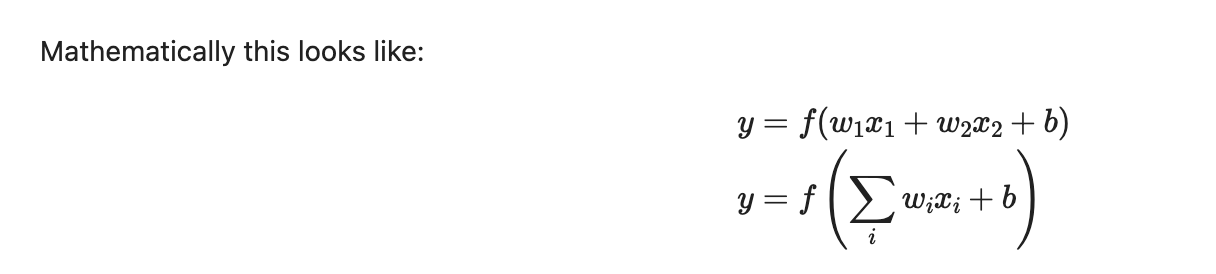

In [189]:
# Calculate the linear combination
linear_combination = torch.sum(features * weights) + bias

# Apply the activation function
output = activation(linear_combination)

# Get the unit's output
print("Output of the network:", output)

Output of the network: tensor([[0.15951]])


In [190]:
weights.shape

torch.Size([1, 5])

In [191]:
weights.reshape(5,1)

tensor([[-0.89483],
        [-0.35563],
        [ 1.23239],
        [ 0.13817],
        [-1.68220]])

In [192]:
weights.resize_(1,4)

tensor([[-0.89483, -0.35563,  1.23239,  0.13817]])

In [193]:
weights

tensor([[-0.89483, -0.35563,  1.23239,  0.13817]])

In [194]:
weights.view(1,-1)

tensor([[-0.89483, -0.35563,  1.23239,  0.13817]])

In [195]:
weights.resize_(1,5)

tensor([[-0.89483, -0.35563,  1.23239,  0.13817, -1.68220]])

In [196]:
torch.transpose(weights,0,1)

tensor([[-0.89483],
        [-0.35563],
        [ 1.23239],
        [ 0.13817],
        [-1.68220]])

In [197]:
# Calculate the linear combination using matrix multiplication
linear_combination = torch.mm(features, weights.view(-1, 1)) + bias

# Apply the activation function
output = activation(linear_combination)

# Get the unit's output
print("Output of the network:", output.item())

Output of the network: 0.15950657427310944


In [198]:
### Generate some data.
torch.manual_seed(7) # Set the random seed so things are predictable.

# Features are 3 random normal variables.
features = torch.randn((1, 3))

# Define the size of each layer in our network.
n_input = features.shape[1]     # Number of input units, must match number of input features.
n_hidden = 2                    # Number of hidden units.
n_output = 1                    # Number of output units.

# Weights for inputs to hidden layer.
W1 = torch.randn(n_input, n_hidden)
# Weights for hidden layer to output layer.
W2 = torch.randn(n_hidden, n_output)

# and bias terms for hidden and output layers.
B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_output))

In [199]:
features

tensor([[-0.14680,  0.78614,  0.94682]])

In [200]:
W1

tensor([[-1.11434,  1.69079],
        [-0.89483, -0.35563],
        [ 1.23239,  0.13817]])

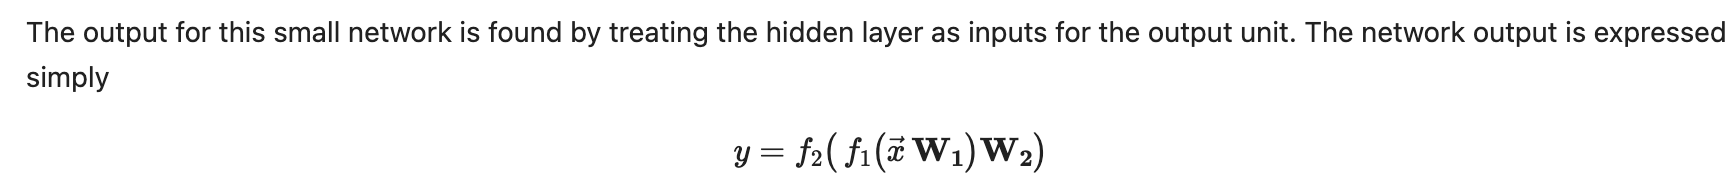

In [201]:
# Calculate the hidden layer input
hidden_layer_input = torch.mm(features, W1) + B1

# Apply the activation function to the hidden layer
hidden_layer_output = activation(hidden_layer_input)

# Calculate the output layer input
output_layer_input = torch.mm(hidden_layer_output, W2) + B2

# Apply the activation function to the output layer
output = activation(output_layer_input)

print("Output of the multi-layer network:", output.item())

Output of the multi-layer network: 0.3170831501483917


In [202]:
hidden_layer_input

tensor([[ 0.75978, -0.25962]])

In [203]:
W2

tensor([[-1.68220],
        [ 0.31768]])

### Numpy to Torch and back

In [204]:
import numpy as np
np.set_printoptions(precision=8)
a = np.random.rand(4,3)
a

array([[0.76024203, 0.98642219, 0.07034638],
       [0.07024243, 0.38451726, 0.06313512],
       [0.90735698, 0.66912411, 0.03737849],
       [0.17427323, 0.82170114, 0.21496746]])

In [205]:
torch.set_printoptions(precision=5)
b = torch.from_numpy(a)
b

tensor([[0.76024, 0.98642, 0.07035],
        [0.07024, 0.38452, 0.06314],
        [0.90736, 0.66912, 0.03738],
        [0.17427, 0.82170, 0.21497]], dtype=torch.float64)

In [206]:
b.numpy()

array([[0.76024203, 0.98642219, 0.07034638],
       [0.07024243, 0.38451726, 0.06313512],
       [0.90735698, 0.66912411, 0.03737849],
       [0.17427323, 0.82170114, 0.21496746]])

If values from tensor changes, the memory stored in the other will change as well.

In [207]:
b.mul_(2)

tensor([[1.52048, 1.97284, 0.14069],
        [0.14048, 0.76903, 0.12627],
        [1.81471, 1.33825, 0.07476],
        [0.34855, 1.64340, 0.42993]], dtype=torch.float64)

In [208]:
a

array([[1.52048406, 1.97284438, 0.14069275],
       [0.14048487, 0.76903452, 0.12627023],
       [1.81471395, 1.33824823, 0.07475699],
       [0.34854647, 1.64340227, 0.42993492]])

### Neural networks with PyTorch

In [209]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

In [210]:
### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [211]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


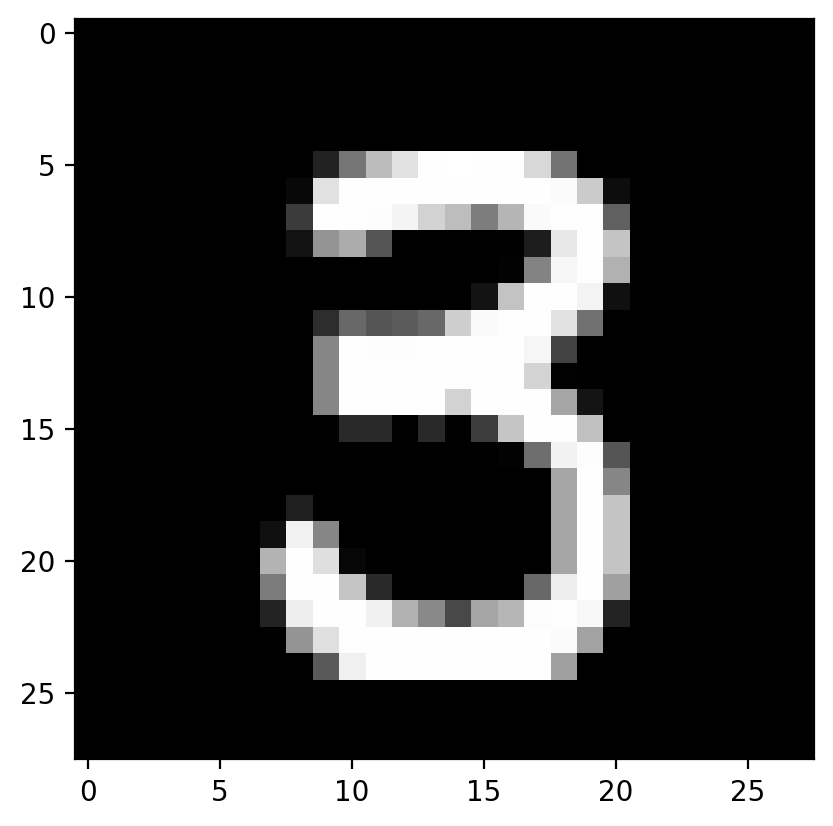

In [212]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [213]:
print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [214]:
flattened_images = images.view(images.size(0), -1)
flattened_images.shape

torch.Size([64, 784])

In [215]:
### Generate some data.
torch.manual_seed(7) # Set the random seed so things are predictable.

# Features are dimensions of images flattened
features = torch.flatten(images,start_dim=1)

# Define the size of each layer in our network.
n_input = features.shape[1]     # Number of input units, must match number of input features.
n_hidden = 2                    # Number of hidden units.
n_output = 1                    # Number of output units.

# Weights for inputs to hidden layer.
W1 = torch.randn(n_input, n_hidden)
# Weights for hidden layer to output layer.
W2 = torch.randn(n_hidden, n_output)

# and bias terms for hidden and output layers.
B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_output))

# Calculate the hidden layer input
hidden_layer_input = torch.mm(features, W1) + B1

# Apply the activation function to the hidden layer
hidden_layer_output = activation(hidden_layer_input)

# Calculate the output layer input
output_layer_input = torch.mm(hidden_layer_output, W2) + B2

# Apply the activation function to the output layer
output = activation(output_layer_input)

output.shape

torch.Size([64, 1])

### The easier way to make it below

In [216]:
## Activation function
def activation(x):
    """ Sigmoid activation function 
        Arguments
        ---------
        x: torch.Tensor
    """
    return 1/(1+torch.exp(-x))

### Neural network
def multi_Layer_NW(inputUnits, hiddenUnits, outputUnits):
    torch.manual_seed(7) # Set the random seed so things are predictable

    # Define the size of each layer in our network
    n_input = inputUnits     # Number of input units, must match number of input features
    n_hidden = hiddenUnits   # Number of hidden units 
    n_output = outputUnits   # Number of output units

    # Weights for inputs to hidden layer
    W1 = torch.randn(n_input, n_hidden)
    # Weights for hidden layer to output layer
    W2 = torch.randn(n_hidden, n_output)

    # and bias terms for hidden and output layers
    B1 = torch.randn((1, n_hidden))
    B2 = torch.randn((1, n_output))

    return W1,W2,B1,B2

def calc_output(features,W1,W2,B1,B2):
    h = activation(torch.matmul(features,W1).add_(B1))
    output = activation(torch.matmul(h,W2).add_(B2))
    return output

# Features are flattened batch input
features = torch.flatten(images,start_dim=1)
W1,W2,B1,B2 = multi_Layer_NW(features.shape[1],256,10)

out = calc_output(features,W1,W2,B1,B2) # output of your network, should have shape (64,10)

In [217]:
out

tensor([[4.17910e-07, 5.22367e-02, 9.92983e-01, 1.84496e-01, 9.68726e-01,
         1.00000e+00, 4.13416e-02, 1.08521e-05, 2.19348e-05, 8.52330e-01],
        [1.31667e-08, 8.64186e-06, 3.23726e-01, 2.85312e-05, 9.52742e-01,
         9.99991e-01, 1.51991e-02, 9.98831e-01, 1.44526e-05, 1.79219e-05],
        [9.36920e-10, 6.25355e-04, 8.95148e-01, 2.33380e-03, 9.83302e-01,
         9.99846e-01, 4.77273e-03, 9.05923e-01, 2.49511e-04, 7.59882e-03],
        [1.39466e-09, 1.29806e-03, 9.15903e-01, 9.83136e-01, 9.99998e-01,
         9.03048e-01, 5.26123e-06, 3.28354e-04, 4.15366e-04, 1.52046e-02],
        [1.25972e-02, 6.46907e-03, 1.30850e-02, 2.63409e-11, 4.87329e-01,
         9.99997e-01, 1.98819e-06, 4.38364e-02, 3.80834e-07, 6.96125e-03],
        [3.69886e-04, 6.98481e-04, 1.63056e-01, 5.40267e-06, 9.75215e-01,
         9.93267e-01, 1.36793e-06, 3.68914e-01, 3.66470e-04, 3.69382e-01],
        [5.21866e-09, 1.36722e-08, 4.52747e-04, 1.90166e-06, 9.74449e-01,
         9.97987e-01, 3.74580e-0

In [218]:
def softmax(x):
    exp_x = torch.exp(x)

    sum_exp_x = torch.sum(exp_x, dim=1, keepdim=True)

    return exp_x / sum_exp_x

    ## TODO: Implement the softmax function here

# Here, out should be the output of the network in the previous exercise with shape (64,10)
probabilities = softmax(out)

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000,
        1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000,
        1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000,
        1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000,
        1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000,
        1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000,
        1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000,
        1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000])


### Building networks with PyTorch

In [219]:
from torch import nn

In [220]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [221]:
# Create the network and look at its text representation
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [222]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x

In [223]:
# Create the network and look at its text representation
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

### Your Turn to Build a Network

In [224]:
from torch import nn
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 128)
        self.hidden2 = nn.Linear(128,64)    
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(64, 10)
        
    def forward(self, x):
        # Hidden layer 1 with relu activation
        x = F.relu(self.hidden(x))

        # Hidden layer 2 with relu activation
        x = F.relu(self.hidden2(x))
        
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x

In [225]:
# Create the network and look at its text representation
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

In [226]:
output_probabilities = model(flattened_images)
output_probabilities.shape

torch.Size([64, 10])

In [227]:
print(model.hidden.weight.shape)
print(model.hidden.weight)

torch.Size([128, 784])
Parameter containing:
tensor([[ 0.00370, -0.03256, -0.01922,  ..., -0.03494,  0.02586,  0.01609],
        [-0.02203, -0.00921,  0.02672,  ..., -0.01611,  0.01410, -0.00445],
        [-0.00641, -0.00729, -0.00315,  ...,  0.01841, -0.00959,  0.00409],
        ...,
        [ 0.00597,  0.00944, -0.00922,  ..., -0.00414,  0.00435,  0.03207],
        [ 0.00720,  0.02007, -0.03522,  ...,  0.01534,  0.03390, -0.02358],
        [-0.00584, -0.00330,  0.03088,  ...,  0.01680,  0.02183, -0.00369]],
       requires_grad=True)


In [228]:
model.hidden.weight.data

tensor([[ 0.00370, -0.03256, -0.01922,  ..., -0.03494,  0.02586,  0.01609],
        [-0.02203, -0.00921,  0.02672,  ..., -0.01611,  0.01410, -0.00445],
        [-0.00641, -0.00729, -0.00315,  ...,  0.01841, -0.00959,  0.00409],
        ...,
        [ 0.00597,  0.00944, -0.00922,  ..., -0.00414,  0.00435,  0.03207],
        [ 0.00720,  0.02007, -0.03522,  ...,  0.01534,  0.03390, -0.02358],
        [-0.00584, -0.00330,  0.03088,  ...,  0.01680,  0.02183, -0.00369]])

In [229]:
# Set biases to all zeros for custom init
model.hidden.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [230]:
# sample from random normal with standard dev = 0.01
model.hidden.weight.data.normal_(std=0.01)

tensor([[-0.00224,  0.00259,  0.00467,  ...,  0.01116,  0.00567, -0.00010],
        [-0.00672, -0.00653,  0.00644,  ...,  0.01323, -0.00331,  0.00896],
        [-0.01935,  0.00236, -0.01467,  ...,  0.00753,  0.00110, -0.02107],
        ...,
        [-0.00261, -0.00588,  0.00561,  ..., -0.00837,  0.01632, -0.00657],
        [-0.00500, -0.00579,  0.00403,  ..., -0.00934,  0.01860,  0.01792],
        [-0.00973, -0.01643, -0.02290,  ...,  0.00601, -0.00794,  0.00983]])

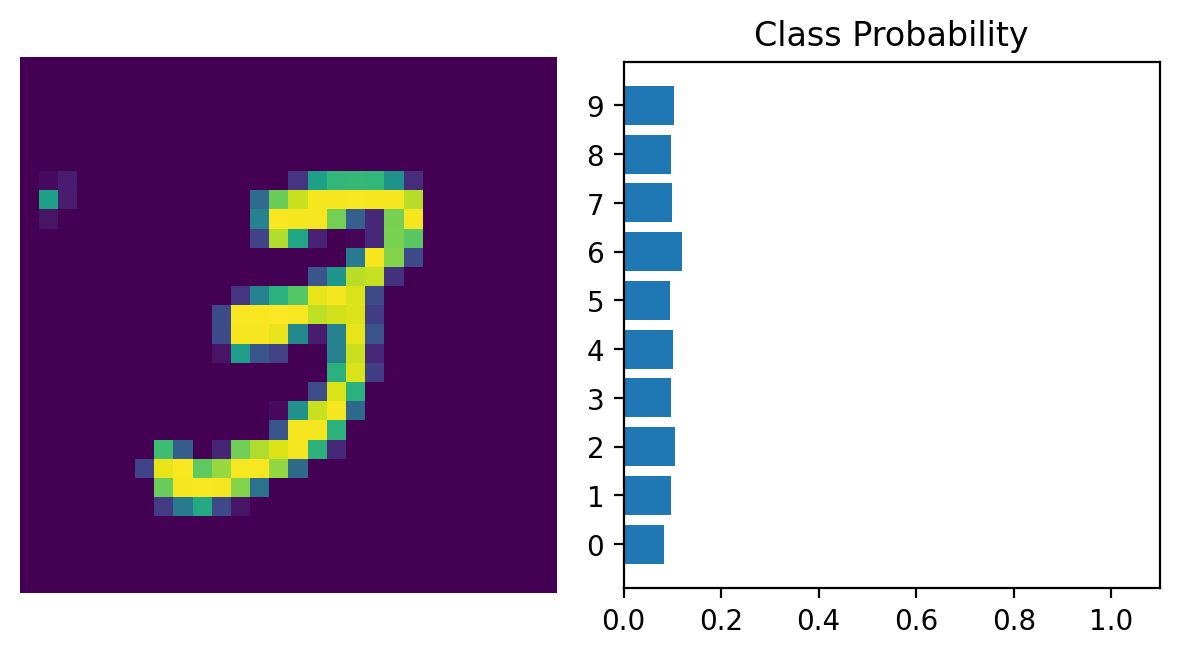

In [231]:
import helper2 as helper

# Grab some data 
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
helper.view_classify(img.view(1, 28, 28), ps)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


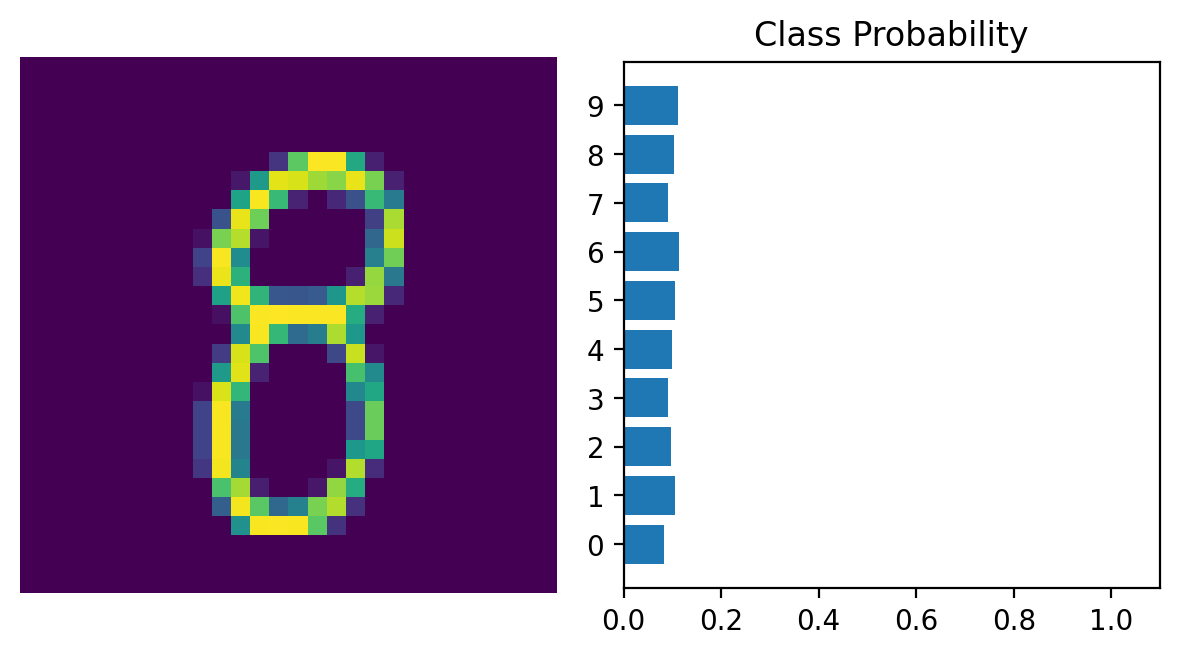

In [232]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1, 28, 28), ps)

In [233]:
print(model[0])
model[0].weight

Linear(in_features=784, out_features=128, bias=True)


Parameter containing:
tensor([[-0.00041, -0.00753,  0.02337,  ..., -0.01897,  0.03226,  0.02638],
        [-0.01558,  0.01413,  0.00996,  ..., -0.02629, -0.03349, -0.02064],
        [-0.00086, -0.01495,  0.01803,  ...,  0.01200, -0.00327,  0.00099],
        ...,
        [-0.03156, -0.01497,  0.02179,  ...,  0.03566,  0.02354,  0.00525],
        [-0.02854,  0.00178, -0.00481,  ...,  0.00088, -0.00701, -0.02087],
        [-0.00120, -0.01859,  0.02960,  ..., -0.02942,  0.00146,  0.02404]],
       requires_grad=True)

In [234]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [235]:
print(model[0])
print(model.fc1)

Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)


In [236]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [237]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10))

# Define the loss
criterion = nn.CrossEntropyLoss()

# Get our data
dataiter = iter(trainloader)

images, labels = next(dataiter)

# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

tensor(2.31522, grad_fn=<NllLossBackward0>)


In [238]:
# TODO: Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))
        

# TODO: Define the loss
criterion = nn.NLLLoss()

### Run this to check your work
# Get our data
dataiter = iter(trainloader)

images, labels = next(dataiter)

# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

tensor(2.30098, grad_fn=<NllLossBackward0>)


In [239]:
x = torch.randn(2,2, requires_grad=True)
print(x)

tensor([[-1.90395, -1.67886],
        [-0.04230,  0.20372]], requires_grad=True)


In [240]:
y = x**2
print(y)

tensor([[3.62502e+00, 2.81859e+00],
        [1.78956e-03, 4.15004e-02]], grad_fn=<PowBackward0>)


In [241]:
## grad_fn shows the function that generated this variable
print(y.grad_fn)

In [242]:
z = y.mean()
print(z)

tensor(1.62172, grad_fn=<MeanBackward0>)


In [243]:
print(x.grad)

None


In [244]:
z.backward()
print(x.grad)
print(x/2)

tensor([[-0.95197, -0.83943],
        [-0.02115,  0.10186]])
tensor([[-0.95197, -0.83943],
        [-0.02115,  0.10186]], grad_fn=<DivBackward0>)


In [245]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
dataiter = iter(trainloader)
images, labels = next(dataiter)
images = images.view(images.shape[0], -1)

logits = model(images)
loss = criterion(logits, labels)

In [246]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.00083,  0.00083,  0.00083,  ...,  0.00083,  0.00083,  0.00083],
        [ 0.00023,  0.00023,  0.00023,  ...,  0.00023,  0.00023,  0.00023],
        [-0.00073, -0.00073, -0.00073,  ..., -0.00073, -0.00073, -0.00073],
        ...,
        [ 0.00582,  0.00582,  0.00582,  ...,  0.00582,  0.00582,  0.00582],
        [ 0.00031,  0.00031,  0.00031,  ...,  0.00031,  0.00031,  0.00031],
        [ 0.00232,  0.00232,  0.00232,  ...,  0.00232,  0.00232,  0.00232]])


In [247]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [248]:
print('Initial weights - ', model[0].weight)

dataiter = iter(trainloader)
images, labels = next(dataiter)
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 0.03366,  0.01736, -0.01648,  ...,  0.01321, -0.02078,  0.01811],
        [ 0.00405, -0.03320,  0.02210,  ..., -0.00798,  0.00035, -0.03430],
        [ 0.00456, -0.01129, -0.01871,  ...,  0.01634, -0.01893, -0.02107],
        ...,
        [-0.03531,  0.02513, -0.00117,  ...,  0.02921, -0.02742,  0.00371],
        [-0.02773,  0.01206,  0.01003,  ...,  0.00466, -0.00250,  0.01097],
        [-0.01555,  0.01816, -0.02059,  ..., -0.00750, -0.02198, -0.00195]],
       requires_grad=True)
Gradient - tensor([[-0.00314, -0.00314, -0.00314,  ..., -0.00314, -0.00314, -0.00314],
        [ 0.00015,  0.00015,  0.00015,  ...,  0.00015,  0.00015,  0.00015],
        [-0.00463, -0.00463, -0.00463,  ..., -0.00463, -0.00463, -0.00463],
        ...,
        [ 0.00862,  0.00862,  0.00862,  ...,  0.00862,  0.00862,  0.00862],
        [-0.00059, -0.00059, -0.00059,  ..., -0.00059, -0.00059, -0.00059],
        [ 0.00085,  0.00085,  0.00085,  ...,  0.00085,  0.

In [249]:
# Take an update step and view the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 0.03369,  0.01739, -0.01645,  ...,  0.01324, -0.02075,  0.01814],
        [ 0.00405, -0.03320,  0.02210,  ..., -0.00798,  0.00035, -0.03430],
        [ 0.00461, -0.01124, -0.01867,  ...,  0.01638, -0.01888, -0.02103],
        ...,
        [-0.03540,  0.02504, -0.00126,  ...,  0.02912, -0.02751,  0.00363],
        [-0.02772,  0.01206,  0.01003,  ...,  0.00466, -0.00250,  0.01098],
        [-0.01556,  0.01815, -0.02060,  ..., -0.00750, -0.02199, -0.00196]],
       requires_grad=True)


In [250]:
## Your solution here

model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.9406075641544642
Training loss: 0.8498717884836929
Training loss: 0.5184230744711625
Training loss: 0.42850278527624824
Training loss: 0.3857995746835971


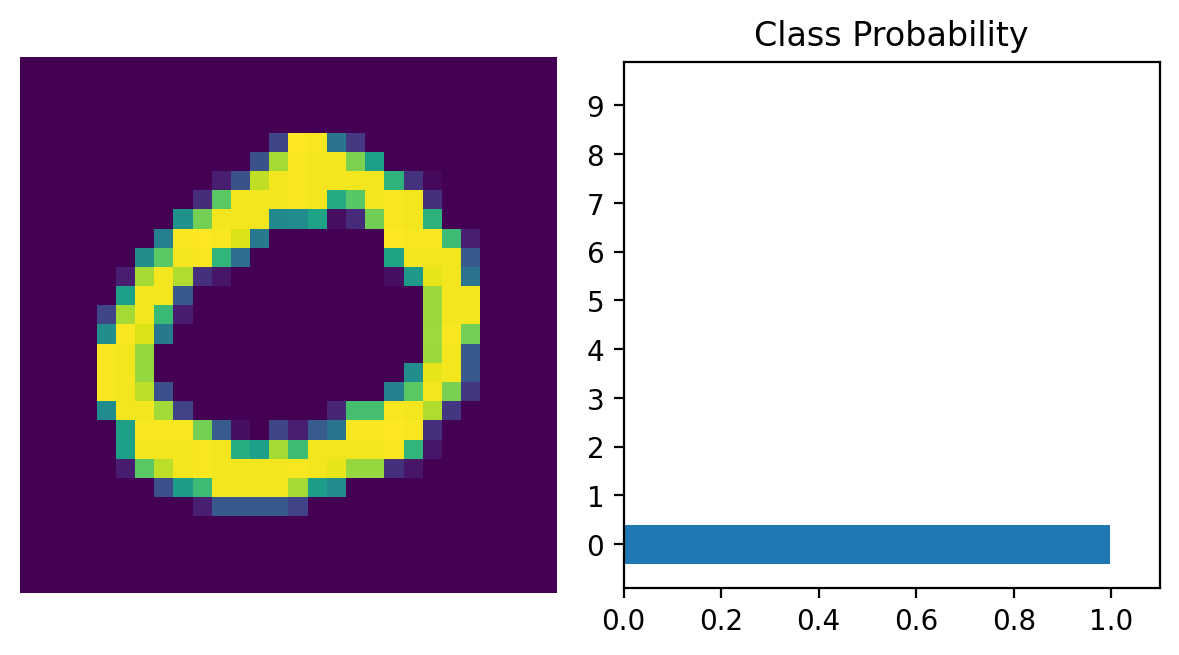

In [251]:
%matplotlib inline
import helper2 as helper

dataiter = iter(trainloader)
images, labels = next(dataiter)

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)

In [252]:
import torch
from torchvision import datasets, transforms
import helper2 as helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

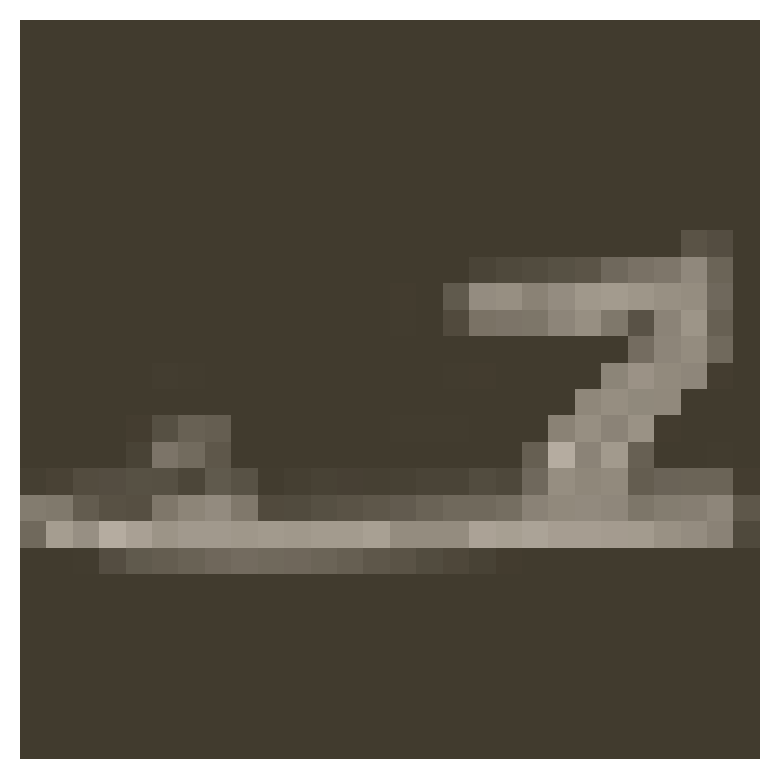

In [253]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

In [267]:
## Your solution here

model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Linear(256, 64),
                      nn.ReLU(),
                      ## nn.Dropout(0.5), Dropout did not help with getting a lower validation loss
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

In [268]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.5002059509822809
Training loss: 0.3711795519187506
Training loss: 0.33198214632107503
Training loss: 0.30808314879629406
Training loss: 0.2890606374025091


In [280]:
## Your solution here

model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Linear(256, 64),
                      nn.ReLU(),
                      nn.Dropout(0.2),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

In [281]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        with torch.no_grad():

            model.eval()

            for images, labels in testloader:
                images = images.view(images.shape[0], -1)
                ps = torch.exp(model(images))

                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy = torch.mean(equals.type(torch.FloatTensor))
            
            # set model back to train mode
            model.train()

            
        print(f'Accuracy: {accuracy.item()*100}%')
        print(f"Training loss: {running_loss/len(trainloader)}")

Accuracy: 75.0%
Training loss: 0.5388306687190842
Accuracy: 87.5%
Training loss: 0.39611422284833914
Accuracy: 87.5%
Training loss: 0.3558919468858857
Accuracy: 87.5%
Training loss: 0.330472666158605
Accuracy: 93.75%
Training loss: 0.3126345766680454


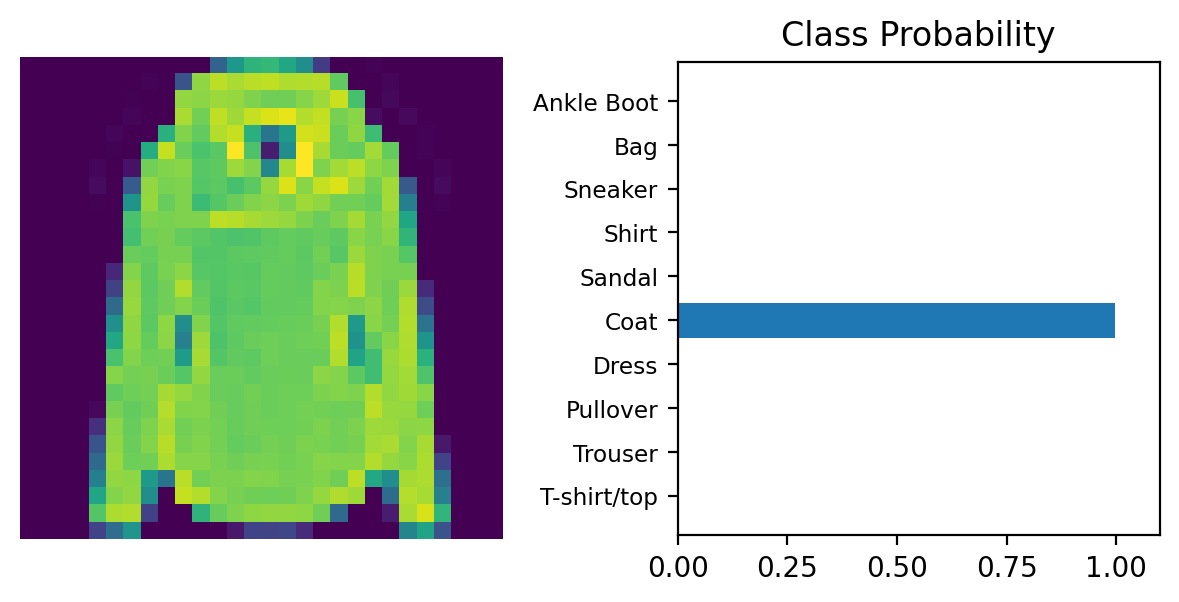

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper2 as helper

# Test out your network!

dataiter = iter(testloader)
images, labels = next(dataiter)
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(logps)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

In [ ]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [ ]:
from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [ ]:
model = Classifier()

images, labels = next(iter(testloader))
# Get the class probabilities
ps = torch.exp(model(images))
# Make sure the shape is appropriate, we should get 10 class probabilities for 64 examples
print(ps.shape)

torch.Size([64, 10])


In [ ]:
top_p, top_class = ps.topk(1, dim=1)
# Look at the most likely classes for the first 10 examples
print(top_class[:10,:])

tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]])


In [ ]:
equals = top_class == labels.view(*top_class.shape)

In [ ]:
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f'Accuracy: {accuracy.item()*100}%')

Accuracy: 6.25%


In [ ]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:        
        ## TODO: Implement the validation pass and print out the validation accuracy
        
        with torch.no_grad():
            
            # set model to evaluation mode
            model.eval()

            for images, labels in testloader:
                ps = torch.exp(model(images))

                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy = torch.mean(equals.type(torch.FloatTensor))
            
            # set model back to train mode
            model.train()

        print(f'Accuracy: {accuracy.item()*100}%')

Accuracy: 81.25%
Accuracy: 87.5%
Accuracy: 87.5%
Accuracy: 87.5%
Accuracy: 81.25%
Accuracy: 75.0%
Accuracy: 100.0%
Accuracy: 75.0%
Accuracy: 93.75%
Accuracy: 87.5%
Accuracy: 87.5%
Accuracy: 100.0%
Accuracy: 93.75%
Accuracy: 93.75%
Accuracy: 87.5%
Accuracy: 93.75%
Accuracy: 81.25%
Accuracy: 93.75%
Accuracy: 100.0%
Accuracy: 100.0%
Accuracy: 75.0%
Accuracy: 93.75%
Accuracy: 100.0%
Accuracy: 93.75%
Accuracy: 100.0%
Accuracy: 87.5%
Accuracy: 81.25%
Accuracy: 93.75%
Accuracy: 93.75%
Accuracy: 93.75%


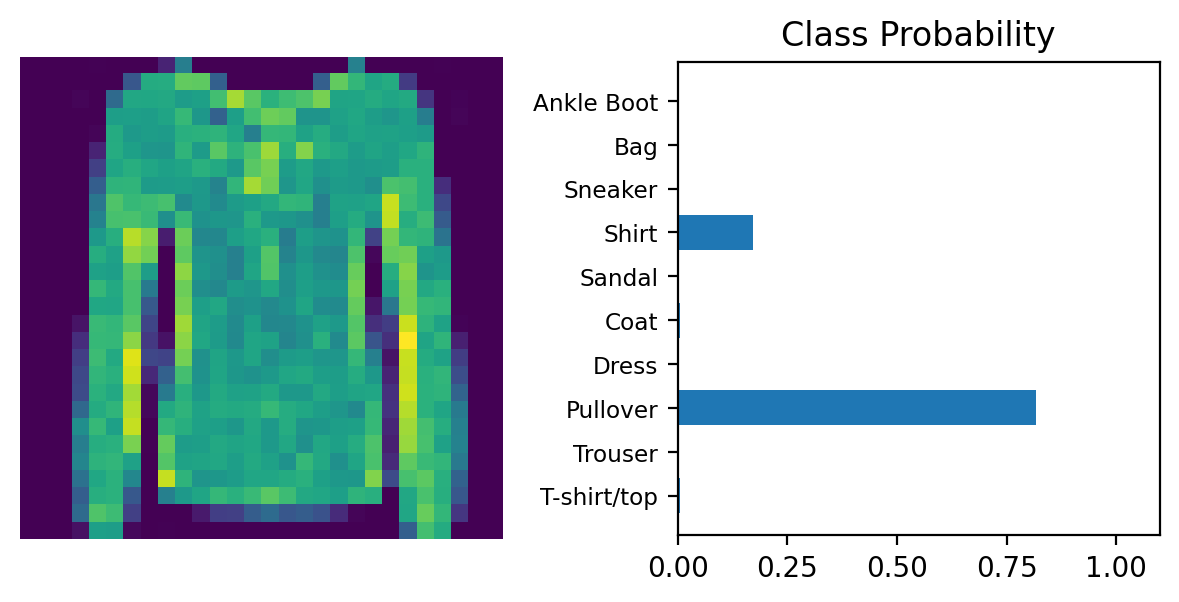

In [290]:
# Import helper module (should be in the repo)
import helper2 as helper

# Test out your network!

model.eval()

dataiter = iter(testloader)
images, labels = next(dataiter)
img = images[0]
# Convert 2D image to 1D vector
img = img.view(1, 784)

# Calculate the class probabilities (softmax) for img
with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)

# Plot the image and probabilities
helper.view_classify(img.view(1, 28, 28), ps, version='Fashion')

### Saving and Loading Models

In [291]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper2 as helper
import fc_model

In [292]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

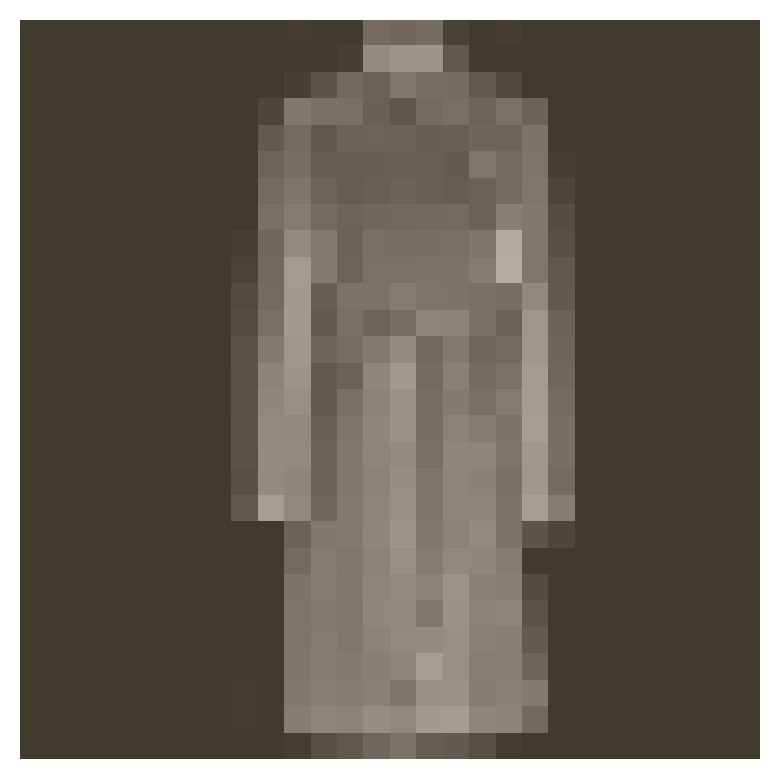

In [293]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

In [294]:
# Create the network, define the criterion and optimizer

model = fc_model.Network(784, 10, [512, 256, 128])
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [295]:
fc_model.train(model, trainloader, testloader, criterion, optimizer, epochs=2)

Epoch: 1/2..  Training Loss: 1.690..  Test Loss: 0.988..  Test Accuracy: 0.639
Epoch: 1/2..  Training Loss: 1.065..  Test Loss: 0.787..  Test Accuracy: 0.700
Epoch: 1/2..  Training Loss: 0.912..  Test Loss: 0.687..  Test Accuracy: 0.744
Epoch: 1/2..  Training Loss: 0.811..  Test Loss: 0.663..  Test Accuracy: 0.745
Epoch: 1/2..  Training Loss: 0.767..  Test Loss: 0.617..  Test Accuracy: 0.767
Epoch: 1/2..  Training Loss: 0.705..  Test Loss: 0.603..  Test Accuracy: 0.771
Epoch: 1/2..  Training Loss: 0.713..  Test Loss: 0.588..  Test Accuracy: 0.770
Epoch: 1/2..  Training Loss: 0.655..  Test Loss: 0.567..  Test Accuracy: 0.782
Epoch: 1/2..  Training Loss: 0.681..  Test Loss: 0.549..  Test Accuracy: 0.789
Epoch: 1/2..  Training Loss: 0.641..  Test Loss: 0.545..  Test Accuracy: 0.800
Epoch: 1/2..  Training Loss: 0.623..  Test Loss: 0.541..  Test Accuracy: 0.795
Epoch: 1/2..  Training Loss: 0.609..  Test Loss: 0.544..  Test Accuracy: 0.806
Epoch: 1/2..  Training Loss: 0.568..  Test Loss: 0.5

In [296]:
print("Our model: \n\n", model, '\n')
print("The state dict keys: \n\n", model.state_dict().keys())

Our model: 

 Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
) 

The state dict keys: 

 odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


In [297]:
torch.save(model.state_dict(), 'checkpoint.pth')

In [299]:
state_dict = torch.load('checkpoint.pth')
print(state_dict.keys())

odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


In [300]:
model.load_state_dict(state_dict)

<All keys matched successfully>

In [302]:
checkpoint = {'input_size': 784,
              'output_size': 10,
              'hidden_layers': [each.out_features for each in model.hidden_layers],
              'state_dict': model.state_dict()}

torch.save(checkpoint, 'checkpoint.pth')

In [303]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = fc_model.Network(checkpoint['input_size'],
                             checkpoint['output_size'],
                             checkpoint['hidden_layers'])
    model.load_state_dict(checkpoint['state_dict'])
    
    return model

In [304]:
model = load_checkpoint('checkpoint.pth')
print(model)

Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=400, bias=True)
    (1): Linear(in_features=400, out_features=200, bias=True)
    (2): Linear(in_features=200, out_features=100, bias=True)
  )
  (output): Linear(in_features=100, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)
